In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [3]:
import matplotlib as mat
import matplotlib.pyplot as plt  
%matplotlib inline 

In [4]:
df = pd.read_csv('/kaggle/input/titanic/train.csv') 

In [5]:
df.shape

(891, 12)

In [6]:
missing_values_count = df.isnull().sum()
missing_values_count[0:12]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df["Age"] = df["Age"].fillna(0)

In [8]:
df["Cabin"] = df["Cabin"].fillna('U')

In [9]:
df['Embarked'].replace('S', 0,inplace=True)
df['Embarked'].replace('C', 1,inplace=True)
df['Embarked'].replace('Q', 2,inplace=True)
df["Embarked"] = df["Embarked"].fillna('4')

In [10]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,0
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,U,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,U,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,U,1


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

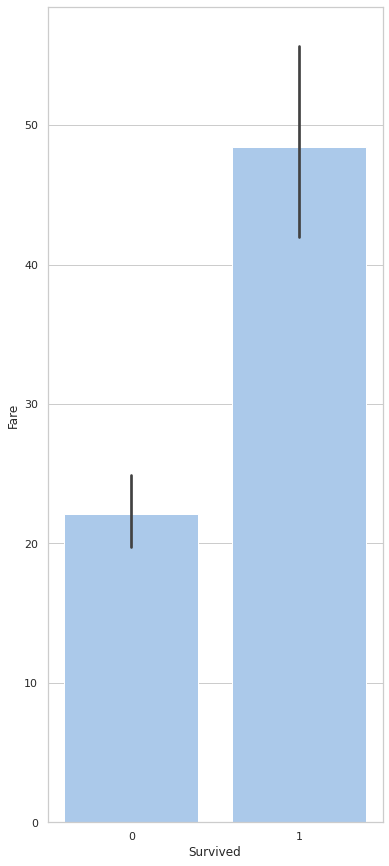

In [12]:
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="Survived", y="Fare", data=df,
            label="Total", color="b")

In [ ]:
sns.boxplot(x="Pclass", y="Survived",
            hue="Sex", palette=["m", "g"],
            data=df)

In [13]:
df['Sex'].replace('female', 0,inplace=True)
df['Sex'].replace('male', 1,inplace=True)

In [14]:
atrib_prev = ['Survived']

In [15]:
atributos =['Age','Fare','Sex','Pclass']

In [16]:
X = df[atributos].values
Y = df[atrib_prev].values

In [17]:
X

array([[22.    ,  7.25  ,  1.    ,  3.    ],
       [38.    , 71.2833,  0.    ,  1.    ],
       [26.    ,  7.925 ,  0.    ,  3.    ],
       ...,
       [ 0.    , 23.45  ,  0.    ,  3.    ],
       [26.    , 30.    ,  1.    ,  1.    ],
       [32.    ,  7.75  ,  1.    ,  3.    ]])

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
modelo_v1 = RandomForestClassifier()
modelo_v1.fit(X,Y.ravel())

RandomForestClassifier()

In [20]:
df2 = pd.read_csv('/kaggle/input/titanic/test.csv') 

In [27]:
missing_values_count = df2.isnull().sum()
missing_values_count[0:12]

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [23]:
df2["Age"] = df2["Age"].fillna(0)

In [24]:
df2["Cabin"] = df2["Cabin"].fillna('U')

In [25]:
df2["Fare"] = df2["Fare"].fillna(0)

In [26]:
df2['Sex'].replace('female', 0,inplace=True)
df2['Sex'].replace('male', 1,inplace=True)

In [ ]:
df2['Embarked'].replace('S', 0,inplace=True)
df2['Embarked'].replace('C', 1,inplace=True)
df2['Embarked'].replace('Q', 2,inplace=True)

In [28]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,U,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,U,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,U,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,U,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,U,S


In [29]:
atributos2 =['Age','Fare','Sex','Pclass']

In [30]:
X2 = df2[atributos2].values

In [31]:
nb_predict_test = modelo_v1.predict(X2)

In [32]:
Y2 = nb_predict_test

In [33]:
Y2

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [34]:
subm = pd.DataFrame({'PassengerId':df2['PassengerId'],'Survived':Y2})

In [35]:
subm.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [36]:
filename = 'Titanic Predictions 2.csv'

subm.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions 2.csv
